# 效率提升與除錯
### 曾聖澧
### January 19, 2023
---

In [1]:
import numpy as np                # 處理數據
import pandas as pd               # 資料處理套件
import time

# 幾個簡單的加速原則
+ **避免重複的動作**

In [2]:
# 應避免的狀況 : 程式碼大量重複
Data = np.array([20,25,24,21,12,25,27])

start = time.time()

x = np.array(sorted(Data, reverse=True))
n = len(Data)
if((n%2) == 0):
    x = x[0:int(n/2)]
    N = len(x)
    if((N%2) == 0):
        interquartile3_result = (x[int(N/2)-1] + x[int((N/2))]) / 2
        print(interquartile3_result)
    elif ((N%2) == 1 ):
        interquartile3_result = x[int((N+1)/2)-1]
        print(interquartile3_result)

elif ((n%2) == 1):
    x = x[0:int((n+1)/2)]
    N = len(x)
    if((N%2)== 0):
        interquartile3_result = (x[int(N/2)-1] + x[int((N/2))]) / 2
        print(interquartile3_result)
        
    elif((N%2) == 1):
        interquartile3_result = x[int((N+1)/2)-1]
        print(interquartile3_result)
        
end = time.time()
print(format(end-start))

25.0
0.0019903182983398438


In [3]:
# 應避免的狀況 : 相同程序重複
start = time.time()

if(len(Data) % 2 == 0):
    x = np.median(Data[np.argsort(Data)[0:int(len(Data)/2)]])
    y = np.median(Data[np.argsort(Data)[int(((len(Data))/2))-1:len(Data)]])
    print(x,y)
else :
    x = np.median(Data[np.argsort(Data)[0:int((len(Data)+1)/2)]])
    y = np.median(Data[np.argsort(Data)[int(((len(Data)+1)/2))-1:len(Data)]])
    print(x,y)
    
end = time.time()
print(format(end-start))

20.5 25.0
0.0009970664978027344


+ **將 for 的 append 替換為 list 直接輸出**
```
在循環的每次迭代中我們都需要調用append，然後在循環的每次迭代中將其作為函數調用
```
+ 比較以下兩種作法使用的時間

In [4]:
### 作法 1
start = time.time()

n = 5000000
x = []
for i in np.arange(n): (x.append(i^2))
    
end = time.time()
print(format(end-start))

3.3226449489593506


In [5]:
### 作法 2
start = time.time()

n = 5000000
x = [i^2 for i in np.arange(n)]
    
end = time.time()
print(format(end-start))

2.2728843688964844


+ **使用局部變數**

```
這與在每個作用域中查詢變數的速度有關，因為它不只是使用局部變數還是全局變數。實際上，即使在函數的局部變數（最快）、類級屬性（例如 self.name，較慢）和全局（例如 導入的函數，如 time.time，最慢）之間，查詢速度實際上也有所不同。
```

In [6]:
start = time.time()

size = 5000
for x in range(size):
    for y in range(size):
        z = x**2 + y**2

end = time.time()
print(format(end-start))

28.879276990890503


+ 定義到函數中，以減少全局變量使用

In [7]:
start = time.time()

def main():  
    size = 5000
    for x in range(size):
        for y in range(size):
            z = x**2 + y**2

main()

end = time.time()
print(format(end-start))

23.650487661361694


+ **使用函數/相似作法，先考慮內建的/別人開發的函式**

```
這似乎違反直覺，因為調用函數會將更多的東西放到堆疊上，並從函數返回中產生開銷，但這與上一點有關。如果僅將整個程式碼放在一個文件中，而不將其放入函數中，則由於全局變數，它的運行速度會慢得多。因此，你可以透過將整個程式碼包裝在函數中，並調用一次來加速程式碼。
```

In [8]:
bigmatrix = np.array([np.arange(1,1e6+1)]).reshape((1000,1000))

start = time.time()

colsums = np.repeat(np.nan, (bigmatrix).shape[1])
 
for i in np.arange(1,(bigmatrix).shape[1]+1):
    s = 0
for j in np.arange(1,(bigmatrix).shape[1]+1):
    s = s + bigmatrix[j-1,i-1]

colsums[i-1] = s

end = time.time()
print(format(end-start))

0.0029544830322265625


In [9]:
start = time.time()

colsums = bigmatrix.sum(axis=0)
     
end = time.time()
print(format(end-start))

0.0009975433349609375


# 其他提高效率技巧

+ 使用日後再遇到還能一看就懂的變數名稱
+ 適當的註解
+ 一致的排版
+ 使用多個變量一起賦值
+ 使用更省記憶體或計算量的資料結構，如 使用 matrix，會比 data.frame 更有效率
+ 使用內置數據類型，如 str、tuple、dict...
+ 儘可能使用足夠的記憶體
+ 用不到的變數就刪掉 (使用 local 或函式)
+ 好的演算法遠勝過硬體提昇
+ 同樣的事可拆成多分(平行或分散計算)

In [10]:
df = (np.array([np.random.normal(size=50000*4)]).reshape((50000,4)))

def myfunc():
    for i in range(50000):
        if (sum(df[i]) > 4):
            ("greater_than_4")
        else:
            ("lesser_than_4")

In [11]:
import threading

start = time.time()

t = threading.Thread(target=myfunc)
t.start()

end = time.time()
print(format(end-start))

0.026983261108398438


In [12]:
start = time.time()

myfunc()

end = time.time()
print(format(end-start))

0.15703344345092773


+ [threading 多執行緒處理](https://steam.oxxostudio.tw/category/python/library/threading.html#a3)
+ [9 个小技巧，加速 Python 的优化思路](https://cloud.tencent.com/developer/article/1846097)
+ [用這 6 種方式優化程式碼，讓你的 Python 速度提升 30%！](https://buzzorange.com/techorange/2020/01/14/raise-speed-of-python/)

# 除錯（debug）
正如資料分析中有 80% 的時間花在資料前處理，寫程式的過程也很可能有 80% 花在 debug。

## 範例錯誤
以下是主要教材 8.3 節的例子

In [13]:
def broken(x):
    def broken2(x):
        y = x * q
        return(y)
    y = broken2(x)
    y2 = y**2
    return(y2)

## 最傳統的 debug 工具
直接將懷疑的部份，以 print() 輸出相關結果，看似很蠢，有時還非得這樣才找得到錯

## debug 的好手氣

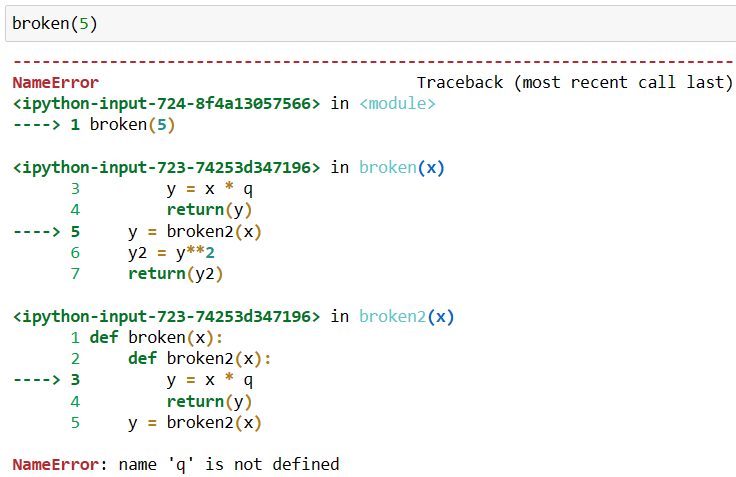

```
上述 Error 就是在跟你說你沒有定義 'q' 這個變數，這個例子是一個較為簡單的 Error，
如果未來遇到看不懂的 Error，其實直接把 Error 丟到網上去搜尋，是個好方法，
你的問題通常也會是其他人的問題，幾乎都找的到解決方法。
```

In [14]:
q = 10
broken(5)

2500

##  debugger pdb
讓你在程式執行中的某個步驟停下來，互動式地查看目前變數、相關設定狀態等。
1. 在你懷疑出問題的地方設定中斷點
2. 執行程式，遇到中斷點的時候停下來
3. 透過 debugger 的指令，來觀察你想要知道的變數值，或是一步一步的執行你的程式看看問題在哪裡
4. Bug 解決了！移除中斷點

+ **不用修改原始程式碼的作法**

```python
python -m pdb 檔案名稱.py
```

詳細執行方式 :
+ [[Python初學起步走-Day30] - 除錯(使用pdb)](https://ithelp.ithome.com.tw/articles/10161849)

+ **在需要插入中斷點的程式碼中插入 breakpoint()  (Python 3.7 之後支援)**

In [15]:
def my_fun(x):
    breakpoint()
    y = x * u
    return(y)

+ **在需要插入中斷點的程式碼插入 import pdb;pdb.set_trace()**

In [16]:
def my_fun(x):
    import pdb;pdb.set_trace()
    y = x * u
    return(y)

以下是些比較常用的 pdb 指令 ：

+ b : (break)，添加 breakpoint
+ p : (print)，印出變數值
+ l : (list)，印出目前所在 function/frame 上下 11 行的程式碼
+ ll : (longlist)，印出目前所在 function/frame 的所有程式碼


+ 執行指令
    + s : (step)，執行下一行程式碼，遇到執行 function 的時候，會進入 function 當中
    + n: (next)，執行下一行程式碼，遇到執行 function 的時候，不會進入 function 中
    + r : (return)，執行程式直到 function return
    + c : (continue)，持續執行程式碼直到遇到下一個中斷點
    + unt : (until)，持續執行程式直到遇到某一行
    
    
+ whatis : 印出 expression 的型別
+ interact : 啟動一個 Python 的 interpreter
+ w : (where)，印出 stack track 狀態
+ q : (quit)，離開 pdb

更多內容 :
+ [pdb — The Python Debugger](https://docs.python.org/3/library/pdb.html)

舉例 :

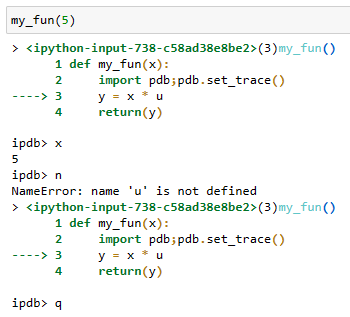

```
執行後會出現一個框(ipdb)讓你輸入上面提到的指令，
在此我先輸入 x，他告訴我 x = 5，
再輸入 n 執行下一行程式碼，他告訴我，我沒定義 u 這個變數，
我發現錯哪了，於是我最後輸入 q 離開對話框
```

## try ... except ... else
+ try ... except 用來檢測 try 語句塊中的錯誤，從而讓 except 語句捕獲異常信息並處理

    + 有時我們不確定程式到底能不能執行，或是一萬次中會有幾次莫名其妙出錯，這時可以用 try 避開迴圈中斷需手動介入的窘境。
    + 有時程式未必是有錯，只是會出現一些例外狀況，用 try/except 語句可以幫忙處理這些狀況。
    + 如果你不想在異常發生時結束你的程序，只需在 try 裡捕獲它

例如 :

In [17]:
try :
    fh = open ( "testfile" , "w" )
    fh.write ( "這是一個測試文件，用於測試異常!!" )
except IOError :
    print("Error: 沒有找到文件或讀取文件失敗")
else :
    print("內容寫入文件成功")
    fh.close ( )

內容寫入文件成功


更詳細內容請參考此連結 :
+ [Python 异常处理](https://www.runoob.com/python/python-exceptions.html)

## debugger 進階 : ipdb
+ ipdb 就是一個可以增強原本 pdb 功能，為 pdb 帶來跟 IPython 一樣的體驗

+ [python ipdb 调试代码](https://blog.csdn.net/weixin_44493841/article/details/102913265)

+ [ipdb 0.13.11](https://pypi.org/project/ipdb/)

+ [別再用 print 來 Debug 啦！來用 Python Debugger 吧！](https://www.icoding.co/2020/07/print-debug-python-debugger)


更多 :
+ [用 print 太慢了！資深工程師要知道這 5 個 debug 工具](https://buzzorange.com/techorange/2021/03/24/5-debug-tool/)

---